In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from cpyment import CModel
from seirt_opt import seirt_abm_gill, seirt_abm_sample

In [56]:
N = 1000
I0 = 0.01
c = 4
beta = 0.3
alpha = 0.1
gamma = 0.3
theta = 0.2
kappa = 0.03
eta = 0.4
chi = 0.2

print('R0 = {0}'.format(beta*c/gamma))

R0 = 4.0


In [57]:
ttest = np.array(seirt_abm_gill(tmax, N, int(I0*N), c, beta, alpha, gamma, theta, kappa, eta, chi))

In [58]:
from scipy.interpolate import interp1d

In [59]:
interp1d(ttest[0], ttest[1:])(t)

array([[990.        , 988.48974055, 987.54325322, ..., 226.        ,
        226.        , 226.        ],
       [  0.        ,   1.51025945,   2.45674678, ...,  16.        ,
         16.        ,  16.        ],
       [ 10.        ,   9.        ,   9.        , ...,   4.42632771,
          4.2055421 ,   3.98897299],
       [  0.        ,   1.        ,   1.        , ..., 650.57367229,
        650.7944579 , 651.01102701],
       [  0.        ,   0.        ,   0.        , ..., 103.        ,
        103.        , 103.        ]])

In [76]:
tmax = 100
params = {
    'tmax': tmax,
    'N': N,
    'I0': int(N*I0),
    'c': c,
    'beta': beta,
    'alpha': alpha,
    'gamma': gamma,
    'theta': theta,
    'kappa': kappa,
    'eta': eta,
    'chi': chi
}
# trajsGill = []

# for i in range(10):
#     print(i)
#     trajsGill.append(np.array(seirt_abm_gill(tmax, N, int(I0*N), c, beta, alpha, gamma, theta, kappa, eta, chi)))

trajsGill = seirt_abm_sample(t, samples=10, params=params)

trajsGillAvg = np.average(trajsGill, axis=0)
trajsGillStd = np.std(trajsGill, axis=0)

In [73]:
# Compartment version
cm = CModel('SEIRT')

etaeff = eta

cm.set_coupling_rate('S*I:S=>E', beta*c/N)
cm.set_coupling_rate('E:E=>I', alpha)
cm.set_coupling_rate('E:E=>T', etaeff*chi*theta)
cm.set_coupling_rate('I:I=>R', gamma)
cm.set_coupling_rate('I:I=>T', theta*(1+etaeff*chi))
cm.set_coupling_rate('T:T=>R', kappa)

cmNoCT = CModel('SEIRT')

cmNoCT.set_coupling_rate('S*I:S=>E', beta*c/N)
cmNoCT.set_coupling_rate('E:E=>I', alpha)
cmNoCT.set_coupling_rate('I:I=>R', gamma)
cmNoCT.set_coupling_rate('I:I=>T', theta)
cmNoCT.set_coupling_rate('T:T=>R', kappa)

In [74]:
t = np.linspace(0, tmax, 1000)
y0 = np.array([N-I0*N, 0, I0*N, 0, 0])

traj = cm.integrate(t, y0)
trajNoCT = cmNoCT.integrate(t, y0)

<IPython.core.display.Javascript object>


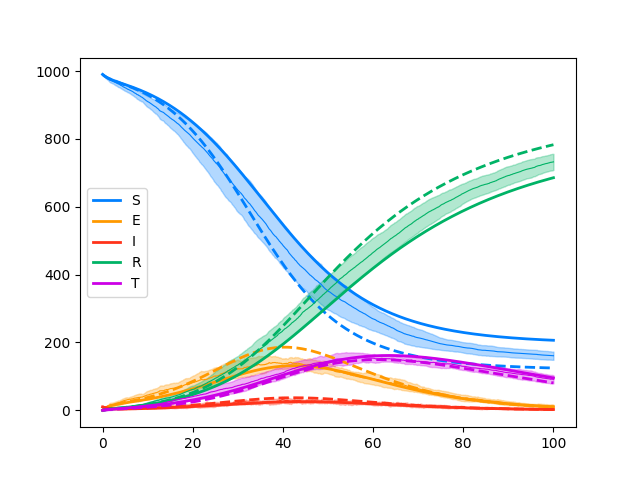

In [83]:
fig, ax = plt.subplots()

colors = [
    (0.0, 0.5, 1.0),
    (1.0, 0.6, 0.0),
    (1.0, 0.2, 0.1),
    (0.0, 0.7, 0.4),
    (0.8, 0.0, 0.9)
]

#ax.set_ylim(0,2000)
stdn = 1
for i in range(5):
    ax.plot(t, traj['y'][:,i], c=colors[i], label='SEIRT'[i], lw=2.0)
    ax.plot(t, trajNoCT['y'][:,i], '--', c=colors[i], lw=2.0)
    ax.plot(t, trajsGillAvg[i], c=colors[i], lw=0.8)
    ax.fill_between(t, trajsGillAvg[i]+stdn*trajsGillStd[i], trajsGillAvg[i]-stdn*trajsGillStd[i], 
                    color=list(colors[i]) + [0.3])
#     for tG in trajsGill:
#         ax.plot(t, tG[i,:].T, c=list(colors[i]) + [0.4], lw=0.6)
    
ax.legend()

In [19]:
np.amax(traj['y'][:,2])/1000

0.025364060672198364

In [20]:
traj['y'][:,2]

array([10.        ,  9.502323  ,  9.0405814 ,  8.61229696,  8.21516412,
        7.84703785,  7.50592239,  7.18996078,  6.89742516,  6.6267077 ,
        6.37631222,  6.14484645,  5.93101469,  5.73361116,  5.55151367,
        5.38367784,  5.22913167,  5.08697054,  4.95635246,  4.83649379,
        4.72666516,  4.62618769,  4.53442952,  4.45080253,  4.37475929,
        4.30579029,  4.24342128,  4.18721082,  4.13674804,  4.09165052,
        4.05156228,  4.01615202,  3.98511135,  3.95815324,  3.93501055,
        3.91543462,  3.89919403,  3.8860734 ,  3.87587226,  3.86840406,
        3.86349517,  3.86098401,  3.86072021,  3.86256386,  3.86638474,
        3.87206169,  3.87948199,  3.88854073,  3.89914034,  3.91119002,
        3.92460531,  3.93930765,  3.95522396,  3.97228626,  3.99043135,
        4.00960043,  4.02973884,  4.05079577,  4.07272395,  4.09547947,
        4.1190215 ,  4.1433121 ,  4.16831602,  4.19400051,  4.22033514,
        4.24729165,  4.27484381,  4.30296725,  4.33163936,  4.36